Import Libs

In [15]:
import rasterio
from rasterio.plot import show
import plotly.graph_objects as go
import numpy as np

Open GeoTIFF files for DSM

In [16]:
dsm = rasterio.open("C:/Code/Geo Files/DSM_files/DHMVIIDSMRAS1m_k22/GeoTIFF/DHMVIIDSMRAS1m_k22.tif",masked=True)
dtm = rasterio.open('C:/Code/Geo Files/DTM_files/DHMVIIDTMRAS1m_k22/GeoTIFF/DHMVIIDTMRAS1m_k22.tif',masked=True)

In [6]:
dsm.bounds

BoundingBox(left=98000.0, bottom=178000.0, right=130000.0, top=198000.0)

Create Windows

In [54]:
x_lambert = 104693.55
y_lambert = 193930.07
window_block = rasterio.windows.from_bounds(x_lambert-40,y_lambert-25,x_lambert+100,y_lambert+60, transform=dsm.transform)

Read with window

In [55]:
building_dsm = dsm.read(1, window=window_block)
building_dtm = dtm.read(1, window=window_block)

Plot 3D

In [59]:
cols, row = np.meshgrid(np.arange(building_dsm.shape[1]),np.arange(building_dsm.shape[0]))
print(type(cols))
print(type(row))
fig = go.Figure(data=[go.Surface(y=cols, x=row, z=(building_dsm-building_dtm))])
print(type(building_dsm))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [60]:
#fig.show()

Open GeoTIFF files for DTM

In [3]:
terrain_HARV_UTM18 = rasterio.open("C:/Code/Geo Files/DTM_files/DHMVIIDTMRAS1m_k01/GeoTIFF/DHMVIIDTMRAS1m_k01.tif", masked=True)
terrain_HARV_UTM18_array = terrain_HARV_UTM18.read(1)
print(type(terrain_HARV_UTM18))

<class 'numpy.ndarray'>


CHM

In [4]:
canopy_HARV = surface_HARV - terrain_HARV_UTM18
#canopy_HARV.compute()


In [7]:
print(type(canopy_HARV))

<class 'numpy.ndarray'>


In [5]:
import matplotlib.pyplot as plt # in case it has not been imported recently
import numpy as np
import plotly.graph_objects as go

In [6]:
fig = go.Figure(data=[go.Surface(z=canopy_HARV,colorscale='viridis')])
fig.show()

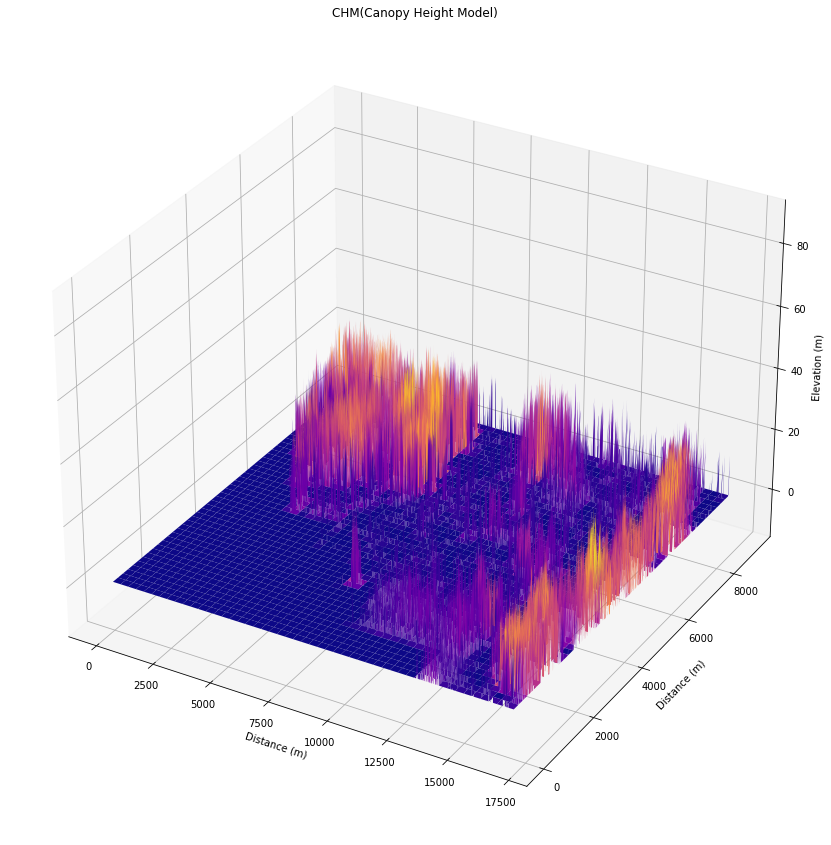

In [9]:
fig = plt.figure( figsize = (15, 15))

ax = fig.add_subplot(111, projection='3d')
#ax2 = fig.add_subplot(312, projection='3d')
#ax3 = fig.add_subplot(313, projection='3d')


xx, yy = np.meshgrid(np.arange(canopy_HARV.shape[1]), np.arange(canopy_HARV.shape[0]))
ax.plot_surface(xx, yy , canopy_HARV, cmap='plasma',linewidth=0)
ax.set_title('CHM(Canopy Height Model)')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Distance (m)')
ax.set_zlabel('Elevation (m)')
ax.view_init(elev=30., azim= -60)
#fig.savefig("chm_3D.png", format = "png", dpi = 200)

Import Some Libs

In [7]:
import xarray
from matplotlib.colors import ListedColormap
import numpy as np

Crop Tiff file

In [2]:
import os
path = '/data'
print(os.path.exists('../data'))

True
